# 2. Exploratory Data Analysis

This notebook performs the following actions:
1. Explore the *reccomendation* dataset
2. Explore the *user-game matrix*
3. Explore the *Games* and *Games Metadata* datasets
4. Explore the *User* dataset


## Exploring the Reccommendation Dataset

The dataset contains over 41 million cleaned and preprocessed user recommendations (reviews) from a Steam Store - a leading online platform for purchasing and downloading video games, DLC, and other gaming-related content. Additionally, it contains detailed information about games and add-ons.

Source: Anton Kozyriev. (2023). Game Recommendations on Steam [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2871694

The recommendation dataset contains these columns:
- *game_id*: the id of a game
- *user_id*: the id of an user
- *review_id*: the id of a review
- *is_recommended* (true or false): whether the user recommended or disrecommended a game
- *number of hours played*: hours played by the user when making a recommendation
- *review date*: date of a review/recommendation
- *helpful*: number of users who found a review helpful 
- *funny*: : number of users who found a review funny

In [1]:
import seaborn as sns

In [2]:
%run "01.Recommendation_Loading.ipynb"

################  Recommendations (all data, positive recommendations only) ################
Users: 12,663,134
Games: 37,419
Number of reviews: 35,304,398
Number of users 2
First five users id [8305133   48950]
################  Recommendations (Sample) ################
Minimum number of recommendations to be included in the sample: 20
Number of randomly selected users: 2
Users: 2
Games: 49
Number of reviews: 49
################ User-Game Matrix ################
Number of Rows: 2
Numbeer of Columns: 49
Number of stored values: 49


Let's set the argument `Sample=False` so we can explore the entire dataset

In [3]:
recommendations = loading_recommendations(recommendations_df, False)

In [4]:
NUMBER_OF_UNIQUE_USERS = recommendations["user_id_categorical"].nunique()
NUMBER_OF_UNIQUE_GAMES = recommendations["app_id_categorical"].nunique()

In [5]:
print("There are", '{0:,.0f}'.format(NUMBER_OF_UNIQUE_USERS) , "users")
print("There are", '{0:,.0f}'.format(NUMBER_OF_UNIQUE_GAMES) , "games")

There are 12,663,134 users
There are 37,419 games


**Dates Range**

In [6]:
np.max(recommendations.date)

Timestamp('2022-12-31 00:00:00')

In [7]:
np.min(recommendations.date)

Timestamp('2010-10-15 00:00:00')

**Average number of reviews per user**

In [8]:
review_user = recommendations.groupby("user_id").size()
review_user = review_user.reset_index().rename({0:"#_reviews"}, axis=1)
review_user.sort_values(by="#_reviews", ascending=False)

,user_id,#_reviews
4446194,5112758,3920
4947646,5669734,3479
10205050,11553593,3392
4696445,5390510,3023
1208026,1353327,2262
...,...,...
5808694,6625784,1
5808691,6625781,1
5808690,6625779,1
5808689,6625777,1


In [9]:
review_user["#_reviews"].describe()

count   12663134.0
mean           2.8
std            6.8
min            1.0
25%            1.0
50%            1.0
75%            3.0
max         3920.0
Name: #_reviews, dtype: float64

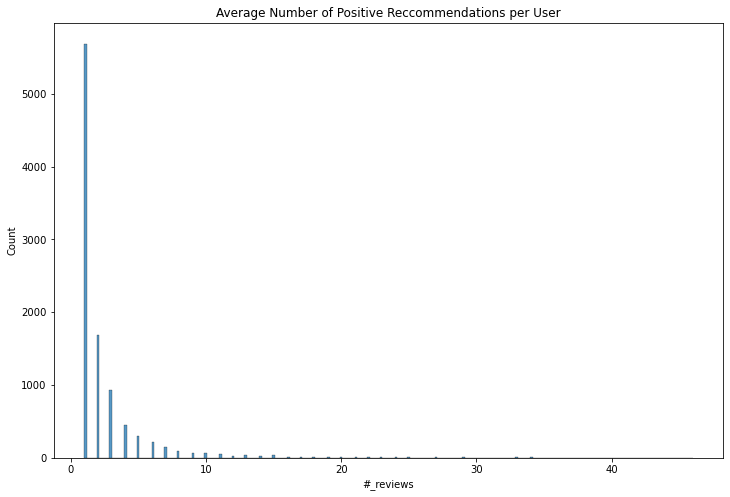

In [46]:
plt.figure(figsize=(12,8))
sns.histplot(data=review_user[review_user["#_reviews"]<50]["#_reviews"].sample(10000))
plt.title("Average Number of Positive Reccommendations per User")
plt.show()

**Average number of reviews per game**

In [11]:
review_game = recommendations.groupby("app_id").size()
review_game = review_game.reset_index().rename({0:"#_reviews"}, axis=1)
review_game.head()

,app_id,#_reviews
0,10,39332
1,20,3685
2,30,3977
3,40,1300
4,50,9283


In [12]:
review_game["#_reviews"].describe()

count    37419.0
mean       943.5
std       6725.9
min          1.0
25%         10.0
50%         29.0
75%        139.0
max     294879.0
Name: #_reviews, dtype: float64

In [13]:
review_game.sort_values(by="#_reviews", ascending=False)

,app_id,#_reviews
18,440,294879
2028,252490,226293
2958,292030,193139
7154,431960,186792
24,730,186306
...,...,...
4038,330590,1
30740,1579000,1
36924,2138010,1
30751,1579800,1


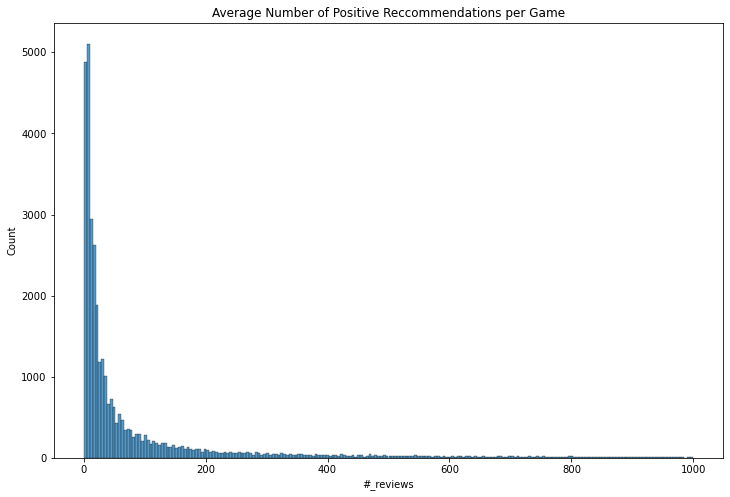

In [48]:
plt.figure(figsize=(12,8))
sns.histplot(data=review_game[(review_game["#_reviews"]>0) & (review_game["#_reviews"]<1000)]["#_reviews"])
plt.title("Average Number of Positive Reccommendations per Game")
plt.show()

In [15]:
# For instance, let's take the reviews of app_id == 10
recommendations[recommendations["app_id"]==10]

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,user_id_categorical,app_id_categorical
21319078,10,2,0,2021-08-30,1,10.3,488,21319078,434,0
26801134,10,0,0,2021-02-07,1,45.8,608,26801134,543,0
18447371,10,2,0,2020-07-06,1,111.3,959,18447371,856,0
27066595,10,0,0,2015-11-05,1,708.0,1334,27066595,1192,0
27583911,10,0,0,2022-10-18,1,411.0,2349,27583911,2119,0
...,...,...,...,...,...,...,...,...,...,...
18425424,10,2,0,2019-06-29,1,898.1,14304814,18425424,12662005,0
18548246,10,0,0,2021-12-27,1,5.1,14305092,18548246,12662256,0
19373711,10,0,0,2021-04-03,1,492.2,14305185,19373711,12662342,0
17777454,10,0,0,2020-09-13,1,95.6,14306029,17777454,12663101,0


## Exploring the User-Game Matrix

Typically, in recommender systems we have to create a *user-item matrix* with the users to the rows and the items (in this case we have games) to the columns.

In [16]:
# this starts from a sample as defined in the 01 Notebook
user_game_matrix.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0]], dtype=int8)

In [17]:
print("There are", '{0:,.0f}'.format(user_game_matrix.shape[0]) , "users")
print("and", '{0:,.0f}'.format(user_game_matrix.shape[1]) , "games")
# the first column of the matrix contains the user_id!

There are 2 users
and 49 games


### The user-game matrix is Sparse

A matrix with a huge number of zero values is a sparse matrix

"Very large matrices require a lot of memory, and some very large matrices that we wish to work with are sparse." https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

In [18]:
type(user_game_matrix)

scipy.sparse.dok.dok_matrix

The `user_game_matrix` is a Compressed Sparse Row matrix. It supports indexing and can be used in machine learning pipelines. 

From the scipy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

Advantages of the CSR format

- efficient arithmetic operations CSR + CSR, CSR * CSR, etc.
- efficient row slicing
- fast matrix vector products

Disadvantages of the CSR format
- slow column slicing operations (consider CSC)
- changes to the sparsity structure are expensive (consider LIL or DOK)

In [19]:
user_game_matrix.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0]], dtype=int8)

In [20]:
sparsity = 1 - (user_game_matrix.count_nonzero() / (user_game_matrix.shape[0]*user_game_matrix.shape[1]))

print("The sparsity of the matrix is '{0:.4%}'".format(sparsity))
print("The density of the matrix is '{0:.4%}'".format(1-sparsity))

The sparsity of the matrix is '50.0000%'
The density of the matrix is '50.0000%'


In [21]:
user_game_matrix[0,43]

1

To what actual user id and game id 0 and 43 correspond to respectively?

In [22]:
users2games_idx = pd.read_csv("matrix/users2games_idx.csv")

In [23]:
user_idx = pd.read_csv("matrix/users_idx.csv")
games_idx = pd.read_csv("matrix/games_idx.csv")

In [24]:
uid = user_idx[user_idx.user_id_categorical==0]["user_id"].iloc[0]
uid

48950

In [25]:
gid = games_idx[games_idx.app_id_categorical==43]["app_id"].iloc[0]
gid

1571440

In [26]:
recommendations[(recommendations["user_id"]==uid) & (recommendations["app_id"]==gid)]

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,user_id_categorical,app_id_categorical
25497430,1571440,0,0,2021-07-29,1,7.6,48950,25497430,43744,30607


It's ok that user_id_categorical and app_id_categorial are different from above because these are computed from the global dataframe while the above value are from the sampled dataframe.

In [27]:
print('{0:,.0f}'.format(len(user_game_matrix[:, 0].toarray())))

2


## Exploring the Games dataset

Source: Anton Kozyriev. (2023). Game Recommendations on Steam [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2871694

Privacy Statement: The dataset does not contain any personal information about users on a Steam Platform. A preprocessing pipeline anonymized all user IDs. All collected data is accessible to a member of the general public.

### Games

The game dataset contains these columns
- *game_id*: the id of a game
- *title*: the title of a game
- *date_release*: release date
- *win*: if a game is supported on Windows
- *mac*: if a game is supported on Mac
- *linux*: if a game is supported on Linux
- *rating*: see a description below
- *positive_ratio*:
- *user_reviews*
- *price_final*
- *price_original*
- *discount*
- *steam_dec*

**Rating**

How rating works?

https://www.reddit.com/r/Steam/comments/ivz45n/what_does_the_steam_ratings_like_very_negative_or/

| %score  | #reviews | rating  | confidence |
|-|-|-|-|
| 95 - 100 | 500+ reviews | positive | overwhelmingly |
| 85 - 100 | 50+ reviews | positive | very |
| 80 - 100 | 10+ reviews | positive | - |  
| 70 - 79 | 10+ reviews | positive | mostly|
| 40 - 69 | 10+ reviews | mixed | - |
| 20 - 39 | 10+ reviews | negative | mostly |
| 0 - 19 | 10+ reviews | negative | - |
| 0 - 19 | 50+ reviews | negative | very |
| 0 - 19 | 500+ reviews | negative | overwhelmingly |

In [28]:
games = pd.read_csv("resources/games.csv")
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,10.0,10.0,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,3.0,3.0,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,15.0,15.0,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,15.0,15.0,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,12.0,12.0,0.0,True


In [29]:
print("There are", games['app_id'].nunique(), "distinct games")

There are 50872 distinct games


In [30]:
games[games["app_id"]==10]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
47375,10,Counter-Strike,2000-11-01,True,True,True,Overwhelmingly Positive,97,136118,10.0,10.0,0.0,True


column: user_reviews. There are fewer reviews in the recommendation dataset compared to the games dataset

***What are the name of the top 10 games that received the greatest number of reviews?***

In [31]:
games_recs_df = recommendations.groupby("app_id").agg({"review_id":np.size}).reset_index()\
    .rename({"review_id":"reccommendations"}, axis=1)
games_recs_df

,app_id,reccommendations
0,10,39332
1,20,3685
2,30,3977
3,40,1300
4,50,9283
...,...,...
37414,2245840,10
37415,2245890,7
37416,2246290,5
37417,2251240,2


In [32]:
games_recs_desc_df = pd.merge(games_recs_df, games, left_on="app_id", right_on="app_id")
games_recs_desc_df.sample(2)

,app_id,reccommendations,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
5450,372190,14,Astro Lords: Oort Cloud,2016-01-15,True,False,False,Mixed,49,55,0.0,0.0,0.0,True
6283,399890,165,The Secret Order 2: Masked Intent,2015-11-05,True,True,True,Very Positive,81,247,10.0,10.0,0.0,True


In [33]:
top10 = games_recs_desc_df.sort_values(by="reccommendations", ascending=False).head(10)
top10

,app_id,reccommendations,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
18,440,294879,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.0,0.0,0.0,True
2028,252490,226293,Rust,2018-02-08,True,True,False,Very Positive,87,786668,40.0,0.0,0.0,True
2958,292030,193139,The Witcher® 3: Wild Hunt,2015-05-18,True,False,False,Overwhelmingly Positive,96,668455,40.0,0.0,0.0,True
7154,431960,186792,Wallpaper Engine,2018-11-01,True,False,False,Overwhelmingly Positive,98,637341,4.0,0.0,0.0,True
24,730,186306,Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True
5517,374320,176742,DARK SOULS™ III,2016-04-11,True,False,False,Very Positive,94,230407,30.0,0.0,0.0,True
20,550,172579,Left 4 Dead 2,2009-11-16,True,True,True,Overwhelmingly Positive,97,574470,10.0,0.0,0.0,True
21,570,171841,Dota 2,2013-07-09,True,True,True,Very Positive,82,2045628,0.0,0.0,0.0,True
1581,227300,171590,Euro Truck Simulator 2,2012-10-12,True,True,True,Overwhelmingly Positive,97,494214,20.0,0.0,0.0,True
7479,444090,171516,Paladins®,2018-05-08,True,True,False,Very Positive,85,339466,0.0,0.0,0.0,True


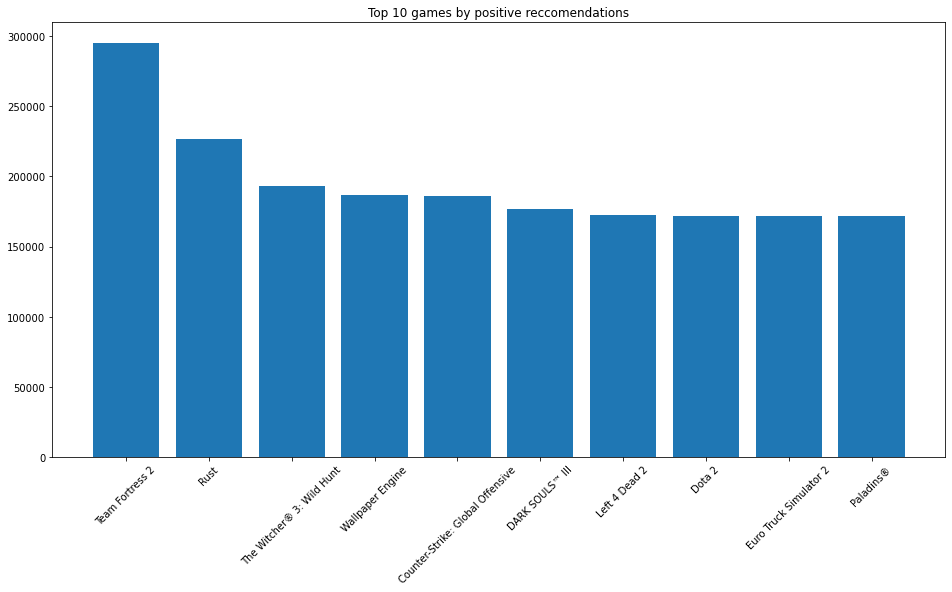

In [49]:
plt.figure(figsize=(16,8))
plt.bar(top10["title"], top10["reccommendations"])
plt.title("Top 10 games by positive reccomendations")
plt.xticks(rotation=45)
plt.show()

***What is the game trend by release year?***

In [55]:
def extract_year(release_date):
    if hasattr(release_date, 'split'):
        components = release_date.split('-')
        if len(components) == 3:
            return int(components[0])
    # Missing value marker
    return 1920

In [57]:
games["release_year"] = games["date_release"].map(extract_year)

In [60]:
games_year = games.groupby("release_year").agg({"app_id":np.size}).reset_index()

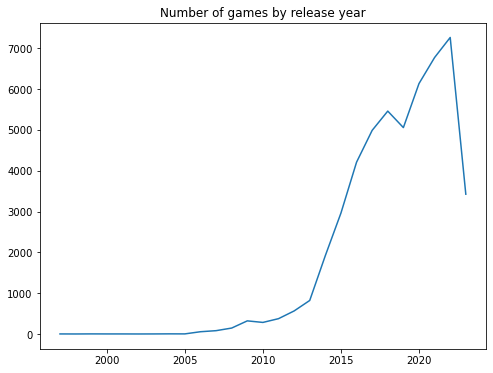

In [67]:
plt.figure(figsize=(8,6))
plt.plot(games_year["release_year"], games_year["app_id"])
plt.title("Number of games by release year")
plt.show()

### Games Metadata

 There is an additional dataset with games metadata containing description and tags (e.g. Action, Adventure).

In [35]:
games_metadata = pd.read_json("resources/games_metadata.json", lines=True)
games_metadata.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [36]:
games_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [37]:
print("There are", games_metadata['app_id'].nunique(), "distinct games")

There are 50872 distinct games


The number of games in `games` and `games metadata` datasets are equal. Now, I check if they contains the same games

In [38]:
games_joined = pd.merge(games, games_metadata, left_on="app_id", right_on="app_id", how="outer", indicator=True)
games_joined.groupby("_merge").count()["app_id"]
# games_joined.head(10)

_merge
left_only         0
right_only        0
both          50872
Name: app_id, dtype: int64

Yes, the two data frames can be safely joined.

Now, let's crate a vocabulary of tags that can be used as features in the recommendation systems

In [39]:
def create_tags_vocabulary(games_metadata):
    """
    Creates a vocabulary of games tags

    Args:
        games_metadata (pandas series) -  each row contains a list of tags
    Returns:
        tags_vocabulary::vocabulary - keys: tags, values: number of occurrence
    """
    tags_vocabulary = dict()
    for row in games_metadata:
        for tag in row:
            if tag not in tags_vocabulary.keys():
                tags_vocabulary[tag] = 1
            else:
                tags_vocabulary[tag] += 1
    return tags_vocabulary


tags_voc = create_tags_vocabulary(games_metadata["tags"])

print("There are", len(tags_voc), "tags")
print("The top 10 tags with their respective count are:", 
sorted(tags_voc.items(), key=lambda item: -item[1])[:5])

There are 441 tags
The top 10 tags with their respective count are: [('Indie', 27957), ('Singleplayer', 22566), ('Action', 21897), ('Adventure', 20183), ('Casual', 17844)]


In [40]:
top_tags = pd.DataFrame(tags_voc.values(), index=tags_voc.keys())\
    .reset_index()\
    .rename({"index":"tag", 0:"#_tags"}, axis=1)\
    .sort_values(by="#_tags", ascending=False).head(10)
top_tags

,tag,#_tags
22,Indie,27957
5,Singleplayer,22566
0,Action,21897
1,Adventure,20183
30,Casual,17844
68,Simulation,12691
33,2D,11438
25,Strategy,11093
44,RPG,10156
8,Atmospheric,8688


<BarContainer object of 10 artists>

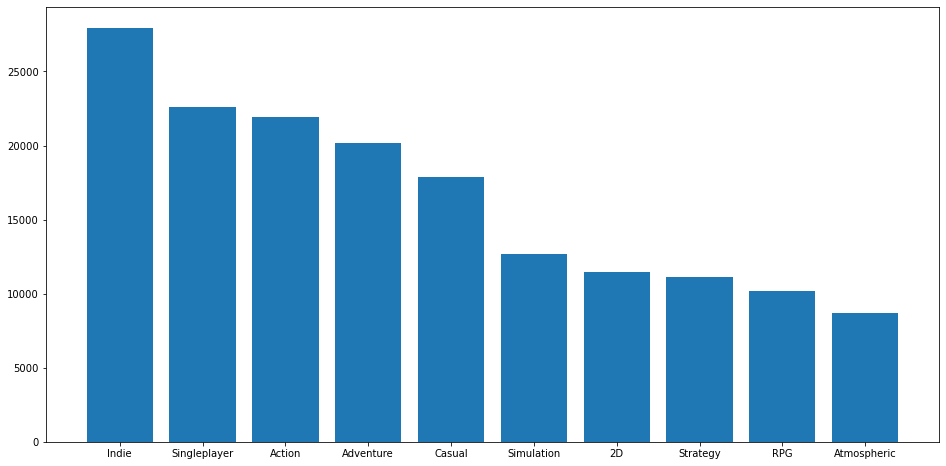

In [41]:
plt.figure(figsize=(16,8))
plt.bar(top_tags["tag"], top_tags["#_tags"])

Creating a data frame having games to the rows and tags to columns. This can be used later for different types for the different recommendation systems (i.e. content-based filtering, collaborative filtering)

In [42]:
def get_matrix_games_tags(df):
    """
    Args:
        df (dataframe): games_metadata
    Returns:
        games_tags (dataframe), games-tag matrix

    This creates a games-tag matrix similar to 
    app_id | Action | RPG | Adventure |
    -------|--------|-----|-----------|
    1545830|        |  1  |           |
    9879765|    1   |     |           |
    
    """
    # creating a new column passing 1. Useful for the final sparse matrix
    df["has_tag"] = 1
    # exploding the tags array into rows
    df = df[["app_id","tags","has_tag"]].explode("tags")
    games_tags = df.pivot_table(values="has_tag", index="app_id", columns="tags")
    games_tags = games_tags.fillna(0)
    games_tags = games_tags.astype("int8")
    return games_tags

matrix_games_tags = get_matrix_games_tags(games_metadata)
matrix_games_tags.head()

tags,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
app_id,,,,,,,,,,,,,,,,,,,,,
10,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
matrix_games_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49628 entries, 10 to 2515460
Columns: 441 entries, 1980s to eSports
dtypes: int8(441)
memory usage: 21.3 MB


## Exploring Users Dataset

In [44]:
import gzip


Source: Anton Kozyriev. (2023). Game Recommendations on Steam [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2871694

Privacy Statement: The dataset does not contain any personal information about users on a Steam Platform. A preprocessing pipeline anonymized all user IDs. All collected data is accessible to a member of the general public.

The user dataset contains these columns:
- *user_id*: anonymous user_id
- *products*: number of purchased games
- *reviews*: reviews by users. 

In [45]:
def decompress_csv(input_file):
    # Read the compressed CSV file
    with gzip.open(input_file, 'rt', encoding='utf-8') as f:
        df = pd.read_csv(f)
    return df

# Example usage
users = decompress_csv('resources/users.csv.gz')
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
